# Project 2: Training Code

# AMES Project Data Cleaning - train_df

- Are missing values inputted appropriately?
- Are distributions examined and described?
- Are outliers identified and addressed?
- Are appropriate summary statistics provided?
- Are steps taken during data cleaning and EDA framed appropriately?
- Does the student address whether or not they are likely to be able to answer their problem statement with the provided data given what they've discovered during EDA?

In [1]:
# standard imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# modeling imports
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV

In [2]:
#read in files
train_csv = './datasets/train.csv'
train_df = pd.read_csv(train_csv)
train_df.head()

test_csv = './datasets/test.csv'
test_df = pd.read_csv(test_csv)
test_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [3]:
# Check for nulls
train_df.isnull().sum()

Id                0
PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage    330
               ... 
Misc Val          0
Mo Sold           0
Yr Sold           0
Sale Type         0
SalePrice         0
Length: 81, dtype: int64

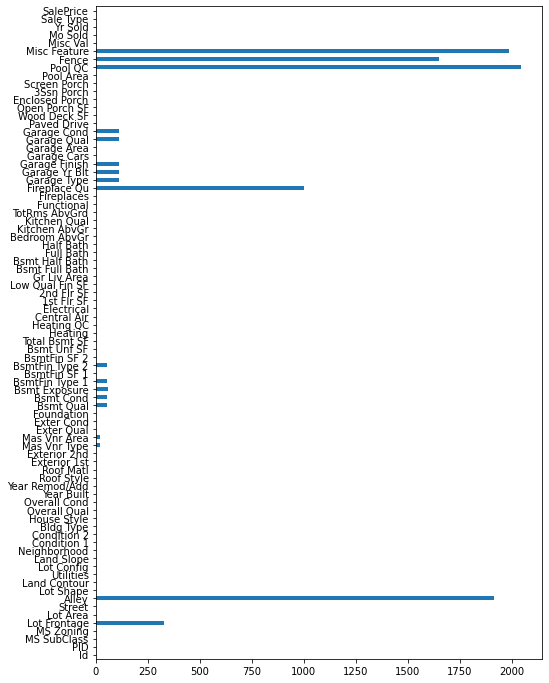

In [4]:
plt.figure(figsize=(8,12))
train_df.isnull().sum().plot(kind='barh');

In [5]:
# Check datatypes for corrupted columns
train_df.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

In [6]:
#Infolist, noting that 2051 is the total amount of rows for train_df
#train_df.info()

In [7]:
#plt.figure(figsize=(10,6))
#plt.scatter(train_df['price'], train_df['sq__ft']);

In [8]:
#train_df.describe()

## Categorical (Nominal) Columns with Null Values - train_df

In [9]:
#Replacing Categorical Null Values with Appropriate Substitutes

In [10]:
train_df['Misc Feature'].value_counts()

Shed    56
Gar2     4
Othr     3
TenC     1
Elev     1
Name: Misc Feature, dtype: int64

In [11]:
train_df['Misc Feature'].fillna('NoMsc',inplace=True)

In [12]:
train_df['Fence'].fillna('NoFn',inplace=True)

In [13]:
train_df['Fence'].value_counts()

NoFn     1651
MnPrv     227
GdPrv      83
GdWo       80
MnWw       10
Name: Fence, dtype: int64

In [14]:
train_df['Fence'].fillna('NoFn',inplace=True)

In [15]:
train_df['Pool QC'].value_counts()

Gd    4
TA    2
Fa    2
Ex    1
Name: Pool QC, dtype: int64

In [16]:
train_df['Pool QC'].fillna('NoPl',inplace=True)

In [17]:
train_df['Garage Cond'].value_counts()

TA    1868
Fa      47
Gd      12
Po       8
Ex       2
Name: Garage Cond, dtype: int64

In [18]:
train_df['Garage Cond'].fillna('NoGar',inplace=True)

In [19]:
train_df['Garage Qual'].value_counts()

TA    1832
Fa      82
Gd      18
Ex       3
Po       2
Name: Garage Qual, dtype: int64

In [20]:
train_df['Garage Qual'].fillna('NoGar',inplace=True)

In [21]:
train_df['Garage Finish'].value_counts()

Unf    849
RFn    579
Fin    509
Name: Garage Finish, dtype: int64

In [22]:
train_df['Garage Finish'].fillna('NoFin',inplace=True)

In [23]:
train_df['Garage Type'].value_counts()

Attchd     1213
Detchd      536
BuiltIn     132
Basment      27
2Types       19
CarPort      11
Name: Garage Type, dtype: int64

In [24]:
train_df['Garage Type'].fillna('NoGar',inplace=True)

In [25]:
train_df['Fireplace Qu'].value_counts()

Gd    523
TA    407
Fa     59
Po     31
Ex     31
Name: Fireplace Qu, dtype: int64

In [26]:
train_df['Fireplace Qu'].fillna('NoFrpl',inplace=True)

In [27]:
train_df['BsmtFin Type 1'].value_counts()

GLQ    615
Unf    603
ALQ    293
BLQ    200
Rec    183
LwQ    102
Name: BsmtFin Type 1, dtype: int64

In [28]:
train_df['BsmtFin Type 1'].fillna('NoBsmt',inplace=True)

In [29]:
train_df['BsmtFin Type 2'].value_counts()

Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFin Type 2, dtype: int64

In [30]:
train_df['BsmtFin Type 2'].fillna('NoBsmt',inplace=True)

In [31]:
train_df['Bsmt Exposure'].value_counts()

No    1339
Av     288
Gd     203
Mn     163
Name: Bsmt Exposure, dtype: int64

In [32]:
train_df['Bsmt Exposure'].fillna('NoBsmt',inplace=True)

In [33]:
train_df['Bsmt Cond'].value_counts()

TA    1834
Gd      89
Fa      65
Po       5
Ex       3
Name: Bsmt Cond, dtype: int64

In [34]:
train_df['Bsmt Cond'].fillna('NoBsmt',inplace=True)

In [35]:
train_df['Bsmt Qual'].value_counts()

TA    887
Gd    864
Ex    184
Fa     60
Po      1
Name: Bsmt Qual, dtype: int64

In [36]:
train_df['Bsmt Qual'].fillna('NoBsmt',inplace=True)

In [37]:
train_df['Mas Vnr Type'].value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

In [38]:
train_df['Mas Vnr Type'].fillna('NoMas',inplace=True)

In [39]:
train_df['Alley'].value_counts()

Grvl    85
Pave    55
Name: Alley, dtype: int64

In [40]:
train_df['Alley'].fillna('NoAlley',inplace=True)

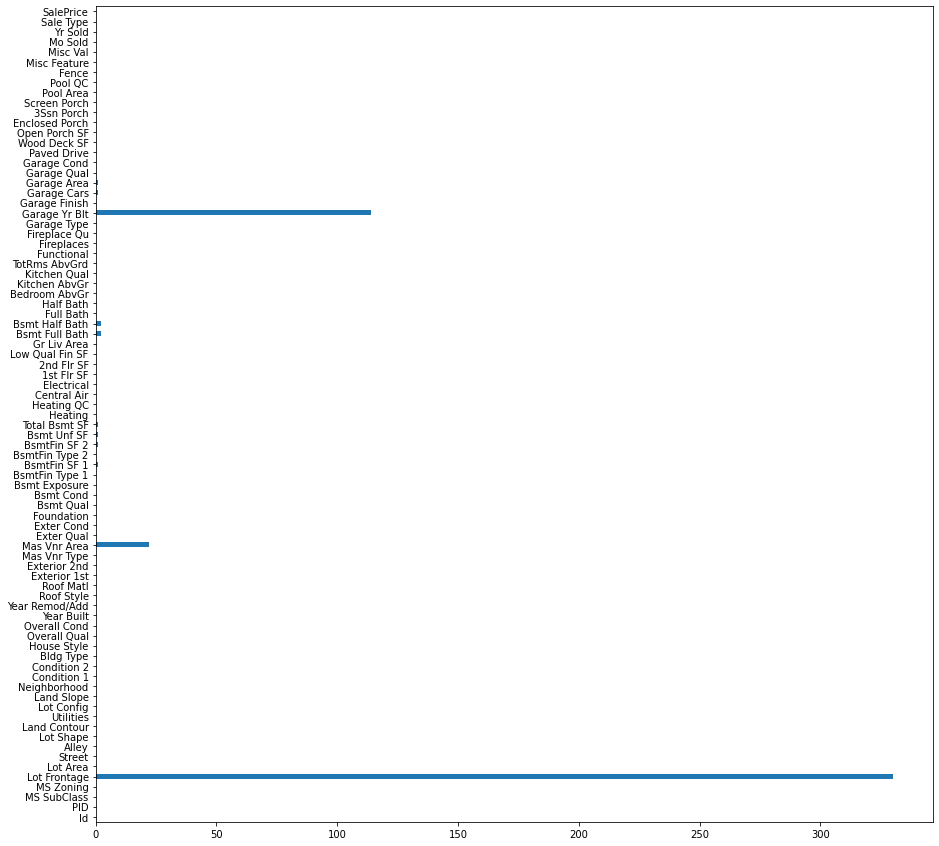

In [41]:
plt.figure(figsize=(15,15))
train_df.isnull().sum().plot(kind='barh');

## Continuous Columns with Null Values - train_df

In [42]:
#Replacing Categorical Null Values with Appropriate Substitutes

In [43]:
train_df['Garage Area'].value_counts()

0.0       113
440.0      70
576.0      69
484.0      52
528.0      46
         ... 
406.0       1
309.0       1
580.0       1
1184.0      1
557.0       1
Name: Garage Area, Length: 514, dtype: int64

In [44]:
train_df['Garage Area'].fillna(0,inplace=True)

In [45]:
train_df['Garage Cars'].value_counts()

2.0    1136
1.0     524
3.0     263
0.0     113
4.0      13
5.0       1
Name: Garage Cars, dtype: int64

In [46]:
train_df['Garage Cars'].fillna(0,inplace=True)

In [47]:
train_df['Garage Yr Blt'].value_counts()

2005.0    105
2007.0     84
2006.0     80
2004.0     72
2003.0     66
         ... 
1917.0      1
1919.0      1
1896.0      1
1895.0      1
1918.0      1
Name: Garage Yr Blt, Length: 100, dtype: int64

In [48]:
train_df['Garage Age'] = 2011 - train_df['Garage Yr Blt']

In [49]:
train_df['Garage Age'].head()

0    35.0
1    14.0
2    58.0
3     4.0
4    54.0
Name: Garage Age, dtype: float64

In [50]:
train_df['Garage Age'].isnull().sum()

114

In [51]:
train_df['Garage Age'].fillna(0,inplace=True)
train_df['Garage Age'].isnull().sum()

0

In [52]:
train_df.drop(columns='Garage Yr Blt',inplace=True)

In [53]:
train_df['Bsmt Full Bath'].value_counts()

0.0    1200
1.0     824
2.0      23
3.0       2
Name: Bsmt Full Bath, dtype: int64

In [54]:
train_df['Bsmt Full Bath'].fillna(0,inplace=True)

In [55]:
train_df['Bsmt Half Bath'].value_counts()

0.0    1923
1.0     122
2.0       4
Name: Bsmt Half Bath, dtype: int64

In [56]:
train_df['Bsmt Half Bath'].isnull().sum()

2

In [57]:
train_df['Bsmt Half Bath'].fillna(0,inplace=True)

In [58]:
train_df['Bsmt Full Bath'].fillna(0,inplace=True)

In [59]:
train_df['Total Bsmt SF'].value_counts()

0.0       54
864.0     51
672.0     20
1040.0    20
816.0     17
          ..
842.0      1
752.0      1
1232.0     1
1480.0     1
1125.0     1
Name: Total Bsmt SF, Length: 892, dtype: int64

In [60]:
train_df['Total Bsmt SF'].fillna(0,inplace=True)

In [61]:
train_df['Bsmt Unf SF'].value_counts()

0.0       165
384.0      14
672.0      11
728.0      10
816.0       9
         ... 
494.0       1
1323.0      1
1041.0      1
314.0       1
2062.0      1
Name: Bsmt Unf SF, Length: 967, dtype: int64

In [62]:
train_df['Bsmt Unf SF'].fillna(0,inplace=True)

In [63]:
train_df['BsmtFin SF 1'].value_counts()

0.0      657
24.0      17
16.0      10
300.0      7
384.0      7
        ... 
848.0      1
70.0       1
688.0      1
472.0      1
661.0      1
Name: BsmtFin SF 1, Length: 821, dtype: int64

In [64]:
train_df['BsmtFin SF 1'].fillna(0,inplace=True)

In [65]:
train_df['BsmtFin SF 2'].value_counts()

0.0      1803
294.0       5
162.0       3
539.0       3
72.0        3
         ... 
712.0       1
529.0       1
215.0       1
252.0       1
823.0       1
Name: BsmtFin SF 2, Length: 205, dtype: int64

In [66]:
train_df['BsmtFin SF 2'].fillna(0,inplace=True)

In [67]:
train_df['Mas Vnr Area'].value_counts()

0.0      1216
120.0      11
176.0      10
200.0      10
180.0       9
         ... 
57.0        1
572.0       1
65.0        1
567.0       1
161.0       1
Name: Mas Vnr Area, Length: 373, dtype: int64

In [68]:
train_df['Mas Vnr Area'].fillna(0,inplace=True)

In [69]:
train_df['Lot Frontage'].value_counts()

60.0     179
70.0      96
80.0      94
50.0      90
65.0      71
        ... 
22.0       1
155.0      1
153.0      1
119.0      1
135.0      1
Name: Lot Frontage, Length: 118, dtype: int64

In [70]:
train_df['Lot Frontage'].fillna(0,inplace=True)

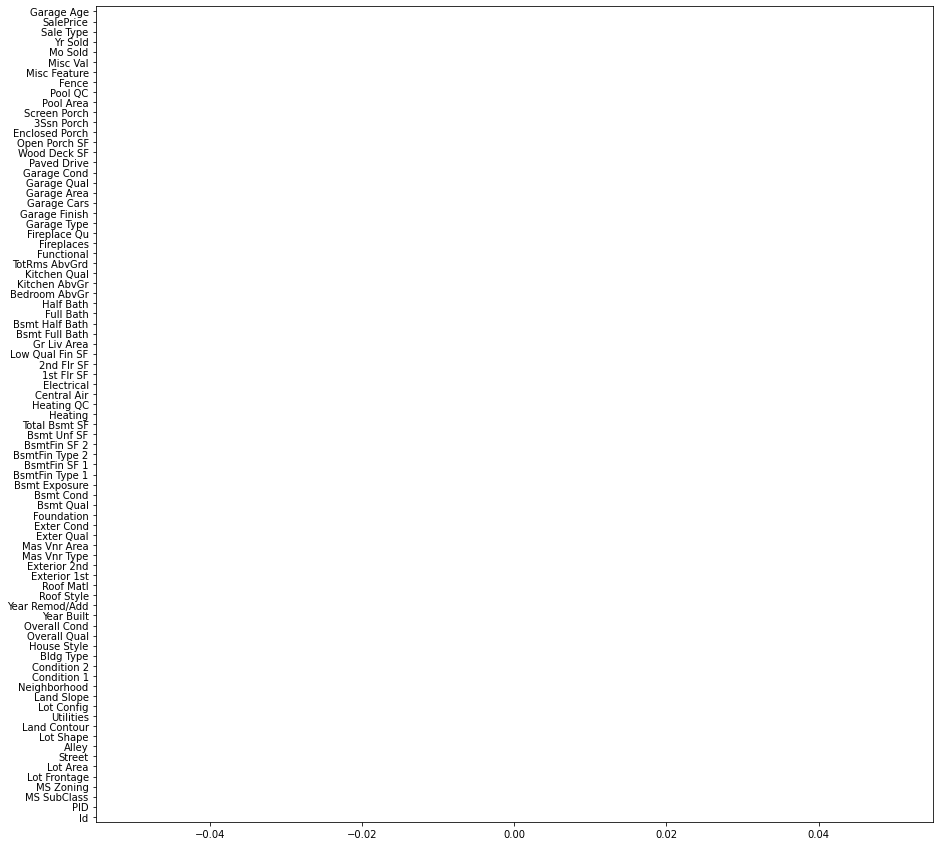

In [71]:
plt.figure(figsize=(15,15))
train_df.isnull().sum().plot(kind='barh');

## Categorical Columns (without Null Values) - train_df

In [72]:
#I'm not using PID because it's nonsense and I don't need it

In [73]:
train_df.shape

(2051, 81)

In [74]:
train_df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Finish',
       'G

In [75]:
train_df = pd.get_dummies(train_df,columns=['Garage Type'],drop_first=True)

In [76]:
train_df = pd.get_dummies(train_df,columns=['Misc Feature'],drop_first=True)

In [77]:
train_df['Neighbor_Dum'] = train_df['Neighborhood']
train_df.drop(columns='Neighborhood',inplace=True)

In [78]:
train_df = pd.get_dummies(train_df, columns=['MS SubClass',
                                             'MS Zoning',
                                             'Street',
                                             'Alley',
                                             'Land Contour',
                                             'Lot Config',
                                             'Neighbor_Dum',
                                             'Condition 1',
                                             'Condition 2',
                                             'Bldg Type',
                                             'House Style',
                                             'Roof Style',
                                             'Roof Matl',
                                             'Exterior 1st',
                                             'Exterior 2nd', 
                                             'Foundation', 
                                             'Heating',
                                             'Central Air',
                                             'Sale Type',
                                             ], 
                          drop_first=True)

In [79]:
train_df

,Id,PID,Lot Frontage,Lot Area,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Year Built,...,Heating_Wall,Central Air_Y,Sale Type_CWD,Sale Type_Con,Sale Type_ConLD,Sale Type_ConLI,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_WD
0,109,533352170,0.0,13517,IR1,AllPub,Gtl,6,8,1976,...,0,1,0,0,0,0,0,0,0,1
1,544,531379050,43.0,11492,IR1,AllPub,Gtl,7,5,1996,...,0,1,0,0,0,0,0,0,0,1
2,153,535304180,68.0,7922,Reg,AllPub,Gtl,5,7,1953,...,0,1,0,0,0,0,0,0,0,1
3,318,916386060,73.0,9802,Reg,AllPub,Gtl,5,5,2006,...,0,1,0,0,0,0,0,0,0,1
4,255,906425045,82.0,14235,IR1,AllPub,Gtl,6,8,1900,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,921126030,79.0,11449,IR1,AllPub,Gtl,8,5,2007,...,0,1,0,0,0,0,0,0,0,1
2047,785,905377130,0.0,12342,IR1,AllPub,Gtl,4,5,1940,...,0,1,0,0,0,0,0,0,0,1
2048,916,909253010,57.0,7558,Reg,AllPub,Gtl,6,6,1928,...,0,1,0,0,0,0,0,0,0,1
2049,639,535179160,80.0,10400,Reg,AllPub,Gtl,4,5,1956,...,0,1,0,0,0,0,0,0,0,1


In [80]:
train_df.shape #checks how many new dummy columns we just made

(2051, 211)

## Ordinal Column Mapping - train_df

In [81]:
#code developed with guidance from Haley Taft and Noah Christiansen
ordinal_columns = {'Lot Shape' : {'IR3' : 1, 'IR2' : 2, 'IR1' : 3, 'Reg' : 4}, 
                   'Utilities': {'ELO' : 0, 'NoSeWa' : 1, 'NoSewr' : 2, 'AllPub' : 3}, 
                   'Land Slope': {'Sev' : 1, 'Mod' : 2, 'Gtl' : 3}, 
                   'Exter Qual': {'Po' : -4, 'Fa' : -1, 'TA' : 0, 'Gd' : 1, 'Ex' : 4},
                   'Exter Cond': {'Po' : -4, 'Fa' : -1, 'TA' : 0, 'Gd' : 1, 'Ex' : 4},
                   'Bsmt Qual' : {'NA':0, 'NoBsmt': 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},   
                   'Bsmt Cond' : {'NA' : 0, 'NoBsmt': 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},  
                   'Bsmt Exposure' : {'NA' : 0,'NoBsmt': 0, 'No' : 1, 'Mn' : 2, 'Av' : 3, 'Gd' : 4}, 
                   'BsmtFin Type 1' : {'NA' : 0,'NoBsmt': 0, 'Unf' : 1, 'LwQ' : 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ' : 6},
                   'BsmtFin Type 2' : {'NA' : 0,'NoBsmt': 0, 'Unf' : 1, 'LwQ' : 2, 'Rec' : 3, 'BLQ' : 4, 'ALQ' : 5, 'GLQ' : 6},
                   'Heating QC' : {'Po' : -4, 'Fa' : -2, 'TA' : 0, 'Gd' : 1, 'Ex' : 2}, 
                   'Electrical' : {'NoElec': 0,'Mix' : 1.5, 'FuseP' : 3, 'FuseF' : 2, 'FuseA' : 1, 'SBrkr' : 0},
                   'Kitchen Qual' : {'Po' : -4, 'Fa' : -1, 'TA' : 0, 'Gd' : 1, 'Ex' : 4},
                   'Functional' : {'Sal' : 7, 'Sev' : 6, 'Maj2' : 5, 'Maj1' : 4, 'Mod': 3, 'Min2' : 2, 'Min1' : 1, 'Typ' : 0}, 
                   'Fireplace Qu' : {'NoFrpl' : 0, 'NA' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
                   'Garage Finish' : {'NoFin' : 0, 'NA' : 0, 'Unf' : 1, 'RFn' : 2, 'Fin' : 3},
                   'Garage Qual' : {'NoGar' : 0, 'NA' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
                   'Garage Cond' : {'NoGar' : 0, 'NA' : 0, 'Po' : 1, 'Fa' : 2, 'TA' : 3, 'Gd' : 4, 'Ex' : 5},
                   'Paved Drive' : {'N' : 0, 'P' : 1, 'Y' : 2},
                   'Pool QC' : {'NoPl' : 0, 'NA' : 0, 'Fa' : 1, 'TA' : 2, 'Gd' : 3, 'Ex' : 4},
                   'Fence' : {'NoFn' : 0, 'NA' : 0, 'MnWw' : 1, 'GdWo' : 2, 'MnPrv' : 3, 'GdPrv' : 4}
                  }

In [82]:
train_df = train_df.replace(ordinal_columns)

In [83]:
train_df.dtypes

Id                   int64
PID                  int64
Lot Frontage       float64
Lot Area             int64
Lot Shape            int64
                    ...   
Sale Type_ConLI      uint8
Sale Type_ConLw      uint8
Sale Type_New        uint8
Sale Type_Oth        uint8
Sale Type_WD         uint8
Length: 211, dtype: object

# Correlation Heatmap

In [84]:
corr = train_df.corr()

In [85]:
#plt.figure(figsize=(20,20))
#sns.heatmap(corr, cmap="Blues", annot=True, vmin=-1, vmax=1, mask=train_df.corr()<0.5);

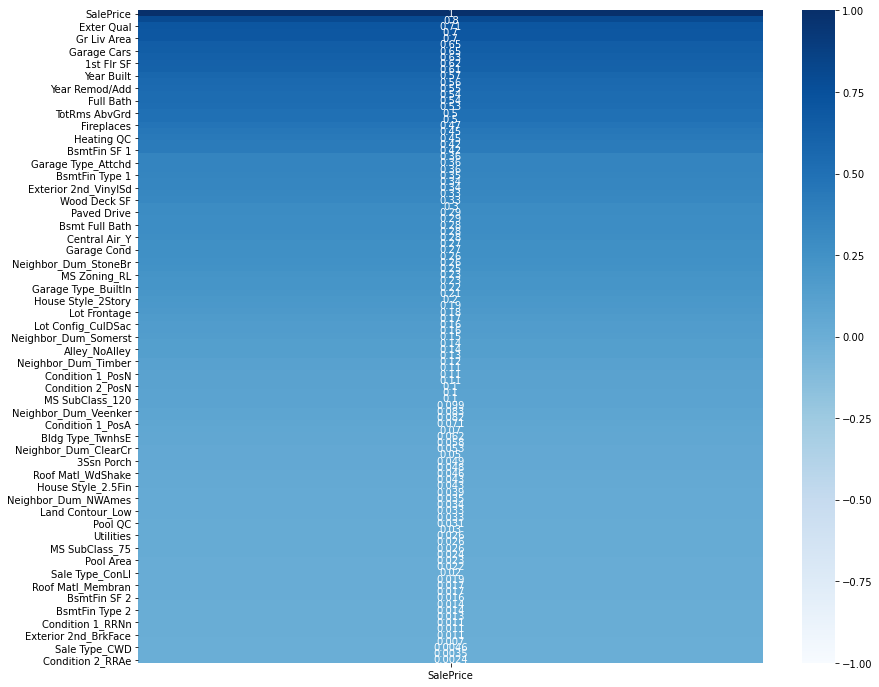

In [86]:
corr = train_df.corr()
# Heatmap of all features correlation with "SalePrice"
corr_saleprice = train_df.corr()[['SalePrice']][train_df.corr()[['SalePrice']] > 0].dropna()
plt.figure(figsize=(14,12))
sns.heatmap(corr_saleprice.sort_values('SalePrice',ascending=False), cmap="Blues", center=0, annot=True, vmin=-1, vmax=1);

In [87]:
#These correlations will be used as the primary features in the Linear Regression to predict housing cost.
#Other values will be picked by hand.

# Exploratory Data Analysis (Identifying/Possibly Dropping Outliers) - train_df


In [88]:
#train_df.plot(kind='scatter', x=['SalePrice'], y=['Overall Qual']);

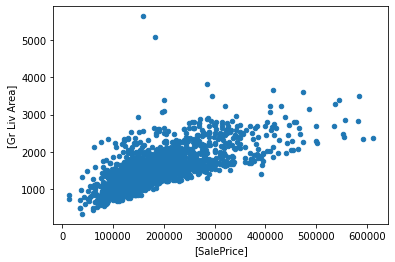

In [89]:
train_df.plot(kind='scatter', x=['SalePrice'], y=['Gr Liv Area']);

In [90]:
train_df.drop(train_df[train_df['Gr Liv Area'] > 5000].index, inplace = True)

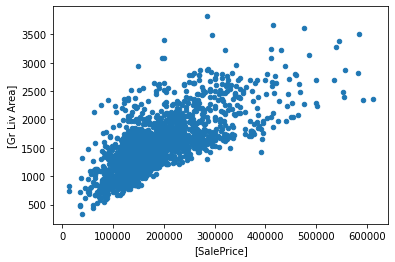

In [91]:
train_df.plot(kind='scatter', x=['SalePrice'], y=['Gr Liv Area']);

In [92]:
#train_df.plot(kind='scatter', x=['SalePrice'], y=['Garage Cars']);

In [93]:
#train_df.plot(kind='scatter', x=['SalePrice'], y=['Total Bsmt SF']);

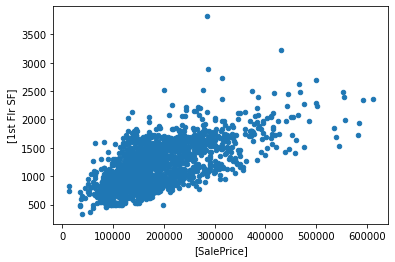

In [94]:
train_df.plot(kind='scatter', x=['SalePrice'], y=['1st Flr SF']);

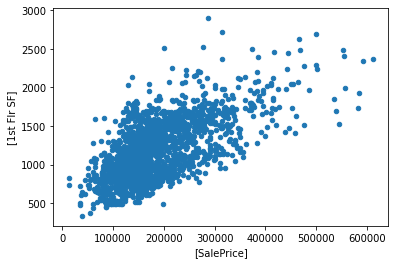

In [95]:
train_df.drop(train_df[train_df['1st Flr SF'] > 3000].index, inplace = True)
train_df.plot(kind='scatter', x=['SalePrice'], y=['1st Flr SF']);

In [96]:
#train_df.plot(kind='scatter', x=['SalePrice'], y=['Year Built']);

In [97]:
#train_df.plot(kind='scatter', x=['SalePrice'], y=['Year Remod/Add']);

In [98]:
#train_df.plot(kind='scatter', x=['SalePrice'], y=['Full Bath']);

In [99]:
#train_df.plot(kind='scatter', x=['SalePrice'], y=['Foundation_PConc']);

In [100]:
#train_df.plot(kind='scatter', x=['SalePrice'], y=['TotRms AbvGrd']);

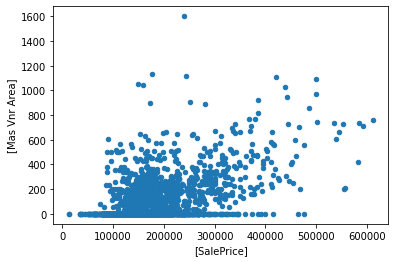

In [101]:
train_df.plot(kind='scatter', x=['SalePrice'], y=['Mas Vnr Area']);

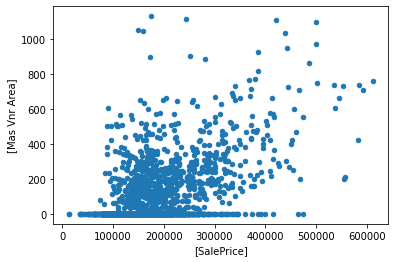

In [102]:
train_df.drop(train_df[train_df['Mas Vnr Area'] > 1200].index, inplace = True)
train_df.plot(kind='scatter', x=['SalePrice'], y=['Mas Vnr Area']);

In [103]:
#train_df.plot(kind='scatter', x=['SalePrice'], y=['Fireplaces']);

In [104]:
#train_df.plot(kind='scatter', x=['SalePrice'], y=['Neighbor_Dum_NridgHt']);

In [105]:
#train_df.plot(kind='scatter', x=['SalePrice'], y=['BsmtFin SF 1']);

In [106]:
#train_df.plot(kind='scatter', x=['SalePrice'], y=['Sale Type_New']);

In [107]:
#train_df.plot(kind='scatter', x=['SalePrice'], y=['MS SubClass_60']);

In [108]:
#train_df.plot(kind='scatter', x=['SalePrice'], y=['Exterior 1st_VinylSd']);

In [109]:
#train_df.plot(kind='scatter', x=['SalePrice'], y=['Exterior 2nd_VinylSd']);

In [110]:
#train_df.plot(kind='scatter', x=['SalePrice'], y=['Open Porch SF']);

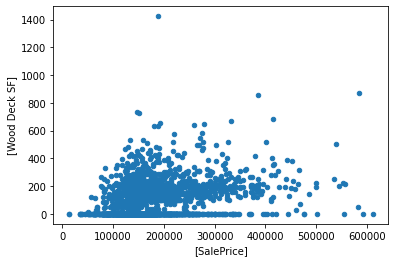

In [111]:
train_df.plot(kind='scatter', x=['SalePrice'], y=['Wood Deck SF']);

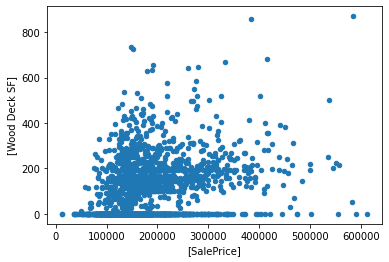

In [112]:
train_df.drop(train_df[train_df['Wood Deck SF'] > 1000].index, inplace = True)
train_df.plot(kind='scatter', x=['SalePrice'], y=['Wood Deck SF']);

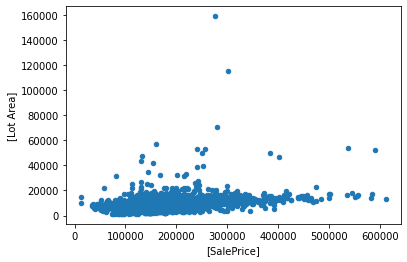

In [113]:
train_df.plot(kind='scatter', x=['SalePrice'], y=['Lot Area']);

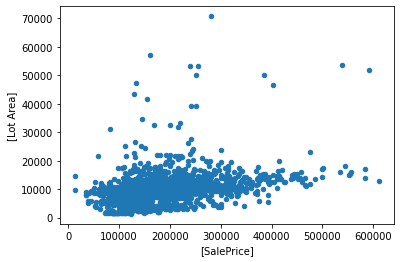

In [114]:
train_df.drop(train_df[train_df['Lot Area'] > 80_000].index, inplace = True)
train_df.plot(kind='scatter', x=['SalePrice'], y=['Lot Area']);

In [115]:
#train_df.plot(kind='scatter', x=['SalePrice'], y=['Bsmt Full Bath']);

In [116]:
#train_df.plot(kind='scatter', x=['SalePrice'], y=['Half Bath']);

In [117]:
#train_df.plot(kind='scatter', x=['SalePrice'], y=['Central Air_Y']);

In [118]:
#train_df.plot(kind='scatter', x=['SalePrice'], y=['Roof Style_Hip']);

In [119]:
#train_df.plot(kind='scatter', x=['SalePrice'], y=['Neighbor_Dum_NoRidge']);

In [120]:
#train_df.plot(kind='scatter', x=['SalePrice'], y=['Neighbor_Dum_StoneBr']);

## Feature Engineering - train_df

In [121]:
train_df['Overall QualLiv'] = train_df['Overall Qual'] * train_df['Gr Liv Area']
train_df['Overall QualSq'] = train_df['Overall Qual'] * train_df['Overall Qual']

#conglomerates bathrooms
train_df['Bathroom Total'] = train_df['Full Bath'] + (0.5 * train_df['Half Bath'])

train_df.shape

(2043, 214)

## Model Definition - train_df

In [122]:
features = ['Kitchen Qual','Garage Cars','Year Built', 'Foundation_PConc',
            'Fireplaces','BsmtFin SF 1','Exterior 1st_VinylSd','Wood Deck SF',
            'Bsmt Full Bath','Roof Style_Hip','2nd Flr SF','House Style_2Story',
            'Exterior 1st_CemntBd','Neighbor_Dum_Somerst','Screen Porch',
            'Condition 1_PosN','Condition 2_PosA', 'Neighbor_Dum_ClearCr',
            'Roof Matl_WdShake','Land Contour_Low',
            'Utilities','Neighbor_Dum_Gilbert','Sale Type_ConLI',
            'BsmtFin SF 2','Condition 1_RRNn','Roof Matl_Tar&Grv',
            #'Condition 2_RRAe',
            #'Neighbor_Dum_GrnHill',
            'Overall Qual','Gr Liv Area','Garage Area',
            'Garage Cars','Total Bsmt SF','1st Flr SF',
            'Year Remod/Add','Full Bath',
            'TotRms AbvGrd','Mas Vnr Area',
            'Fireplaces','Neighbor_Dum_NridgHt',
            'Sale Type_New','MS SubClass_60','Exterior 1st_VinylSd',
            'Exterior 2nd_VinylSd','Open Porch SF',
            'Lot Area','Bsmt Full Bath','Half Bath',
            'Central Air_Y','Roof Style_Hip','Neighbor_Dum_NoRidge',
            'Neighbor_Dum_StoneBr','MS Zoning_RL', 'Lot Frontage', 
            'Lot Config_CulDSac','Alley_NoAlley','Neighbor_Dum_Timber',
            'MS Zoning_FV','Condition 2_PosA','Neighbor_Dum_CollgCr',
            'Bldg Type_TwnhsE','Roof Matl_WdShake','House Style_2.5Fin',
            'Sale Type_Con','MS SubClass_75','Land Contour_Low',
            'Exterior 1st_BrkFace','Roof Matl_Tar&Grv','Condition 1_RRNn',
            'Sale Type_CWD','Overall QualSq','Bathroom Total','Overall QualLiv']

In [123]:
X = train_df[features]
y = train_df['SalePrice']

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

## Model and Fit - train_df

In [125]:
linreg = LinearRegression()

In [126]:
train_df.dtypes

Id                   int64
PID                  int64
Lot Frontage       float64
Lot Area             int64
Lot Shape            int64
                    ...   
Sale Type_Oth        uint8
Sale Type_WD         uint8
Overall QualLiv      int64
Overall QualSq       int64
Bathroom Total     float64
Length: 214, dtype: object

In [127]:
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [128]:
linreg.score(X_train,y_train)

0.920312232504651

In [129]:
linreg.score(X_test,y_test)

0.9206987051776873

In [130]:
cross_val_score(estimator=linreg,X=X_train, y=y_train)

array([0.92627959, 0.91257037, 0.85785312, 0.91835073, 0.91148589])